In [23]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pickle

In [2]:
DIRECTORY=r'D:\jupyter\TB_Chest_Radiography_Database'
CATEGORIES=['Normal','Tuberculosis']

In [3]:
def img_processing(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(3,3),cv2.BORDER_DEFAULT)
    blur_eqhist = cv2.equalizeHist(blur)
    dilate = cv2.dilate(blur_eqhist,(7,7),iterations=3)
    img = cv2.merge((dilate,dilate,dilate))
    return img

In [4]:
IMG_SIZE=300;
data=[]

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY,category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_arr = cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        img_arr = img_processing(img_arr)    
        data.append([img_arr,label])

In [24]:
len(data)

4200

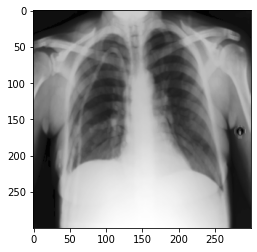

In [6]:
plt.imshow(data[0][0])

In [7]:
random.shuffle(data)

In [8]:
X=[]
Y=[]

for features,labels in data:
    X.append(features)
    Y.append(labels)

In [9]:
X=np.array(X)
Y=np.array(Y)

X=X/255

In [10]:
print(X.shape)
print(Y.shape)

(4200, 300, 300, 3)
(4200,)


In [11]:
print(Y)

[0 0 0 ... 0 0 0]


In [12]:
pickle.dump(data,open("tb_dataset",'wb'))

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.optimizers import SGD,Adam

In [14]:
model=Sequential()

model.add( Conv2D(32,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(128,(3,3), activation='relu' ) )
model.add( Conv2D(128,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Flatten() )

model.add( Dense(128,input_shape=X.shape[1:],activation='relu') )
model.add(Dense(2,activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(X,Y,epochs=3,validation_split=0.3)

Epoch 1/3
92/92 [==============================] - 430s 5s/step - loss: 0.4069 - accuracy: 0.8320 - val_loss: 0.1845 - val_accuracy: 0.9405
Epoch 2/3
92/92 [==============================] - 436s 5s/step - loss: 0.2046 - accuracy: 0.9276 - val_loss: 0.1131 - val_accuracy: 0.9540
Epoch 3/3
92/92 [==============================] - 429s 5s/step - loss: 0.1414 - accuracy: 0.9527 - val_loss: 0.1182 - val_accuracy: 0.9524


In [17]:
model.save("tuberculosis model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: tuberculosis model\assets


In [18]:
predict_data=data[200]
x=predict_data[0]/255
x

array([[[0.82745098, 0.82745098, 0.82745098],
        [0.74901961, 0.74901961, 0.74901961],
        [0.61176471, 0.61176471, 0.61176471],
        ...,
        [0.14117647, 0.14117647, 0.14117647],
        [0.1372549 , 0.1372549 , 0.1372549 ],
        [0.1372549 , 0.1372549 , 0.1372549 ]],

       [[0.82745098, 0.82745098, 0.82745098],
        [0.74901961, 0.74901961, 0.74901961],
        [0.61176471, 0.61176471, 0.61176471],
        ...,
        [0.14117647, 0.14117647, 0.14117647],
        [0.1372549 , 0.1372549 , 0.1372549 ],
        [0.1372549 , 0.1372549 , 0.1372549 ]],

       [[0.82745098, 0.82745098, 0.82745098],
        [0.74901961, 0.74901961, 0.74901961],
        [0.61176471, 0.61176471, 0.61176471],
        ...,
        [0.14117647, 0.14117647, 0.14117647],
        [0.1372549 , 0.1372549 , 0.1372549 ],
        [0.1372549 , 0.1372549 , 0.1372549 ]],

       ...,

       [[0.21176471, 0.21176471, 0.21176471],
        [0.19607843, 0.19607843, 0.19607843],
        [0.15294118, 0

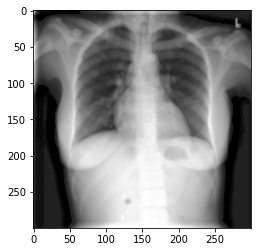

In [19]:
plt.imshow(x)

In [20]:
predictions=model.predict(np.array([x]))
predictions

array([[0.9897425 , 0.01025753]], dtype=float32)

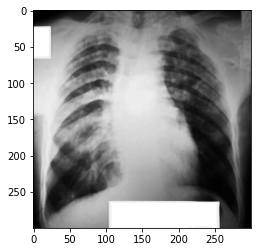

In [21]:
img= r'D:\jupyter\TB_Chest_Radiography_Database\Tuberculosis\Tuberculosis-200.png'
img=cv2.imread(img)
img=img_processing(img)
img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
plt.imshow(img)

In [22]:
predictions=model.predict(np.array([img]))
predictions

array([[0., 1.]], dtype=float32)